
<img src="https://th.bing.com/th/id/OIP.UALyJPEFAcMOe4IIyDoQbwAAAA?w=192&h=174&c=7&r=0&o=5&dpr=1.5&pid=1.7"  alt="Unable to display picture, please check the network" style="height:90px;" align="right"/>

<!-- <img src=" https://phys100.xmu.edu.cn/2020images/gold100.png"  alt="Unable to display picture, please check the network" style="height:85px;" align="right"/> -->
<hr>
<font face="微软雅黑" size=2><p align="right">院选课 《 <i>机器学习</i> 》 第 二 次作业——翟家辉 (<i>19720212203881</i>) </p></font> 
<hr>

# 

<font face="华文行楷" size=8 ><div align='center'>多元线性回归与预测</div></font> 

    
 <font face="华文行楷" size=6 ><div align='center'>(Multiple linear regression and prediction)</div></font> 




---------------------
________________________
<font size=6><div align='center'> **---------------------------目录---------------------------**</div></font>

$\quad$

<font size=5> **&#x2705; 壹 · 线性回归介绍**
    
$\quad$
    
<font size=5> **&#x2705; 贰 · 训练集与测试集**

$\quad$
    
<font size=5> **&#x2705; 叁 · 多项式拟合**

$\quad$
    
<font size=5> **&#x2705; 肆 · 傅里叶级数拟合**

$\quad$
    
<font size=5> **&#x2705; 伍 · 结语**

In [627]:
#常用库及命令

import numpy as np
    # 矩阵运算
import matplotlib.pyplot as plt
    # 绘图
import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
import math
    # 数学运算
import scipy as sc
    # 科学运算及其他
import sympy as sy
    # 符号计算
from scipy.optimize import curve_fit
    # 函数拟合
from scipy.fft import fft,fftfreq
    # 快速FFT变换
# import numba as nb
    # CUDA加速
import time
    # 记录时间
from scipy.integrate import odeint
    # ODE求解
from scipy.integrate import solve_ivp
    # 变步长积分
import matplotlib.animation as animation
    # 动画
from joblib import Parallel, delayed
    # CPU并行加速
from tqdm import tqdm
    # 进度条显示
import taichi  
import copy
# %matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号
    


<h1>文档细目<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"></a></span></li><li><span><a href="#一-·-线性回归介绍" data-toc-modified-id="一-·-线性回归介绍-2">一 · 线性回归介绍</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#矩阵数据与符号约定" data-toc-modified-id="矩阵数据与符号约定-2.0.1">矩阵数据与符号约定</a></span></li><li><span><a href="#假设函数" data-toc-modified-id="假设函数-2.0.2">假设函数</a></span></li><li><span><a href="#损失函数" data-toc-modified-id="损失函数-2.0.3">损失函数</a></span></li><li><span><a href="#梯度下降拟合" data-toc-modified-id="梯度下降拟合-2.0.4">梯度下降拟合</a></span></li><li><span><a href="#超参数" data-toc-modified-id="超参数-2.0.5">超参数</a></span></li><li><span><a href="#矢量解析解" data-toc-modified-id="矢量解析解-2.0.6">矢量解析解</a></span></li></ul></li></ul></li><li><span><a href="#二-·--训练集与测试集" data-toc-modified-id="二-·--训练集与测试集-3">二 ·  训练集与测试集</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#无偏训练集与测试集" data-toc-modified-id="无偏训练集与测试集-3.0.1">无偏训练集与测试集</a></span></li><li><span><a href="#设计矩阵" data-toc-modified-id="设计矩阵-3.0.2">设计矩阵</a></span></li><li><span><a href="#随机扰动" data-toc-modified-id="随机扰动-3.0.3">随机扰动</a></span></li></ul></li></ul></li><li><span><a href="#三-·-多项式拟合" data-toc-modified-id="三-·-多项式拟合-4">三 · 多项式拟合</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#解析解" data-toc-modified-id="解析解-4.0.1">解析解</a></span></li><li><span><a href="#梯度下降法学习曲线" data-toc-modified-id="梯度下降法学习曲线-4.0.2">梯度下降法学习曲线</a></span></li><li><span><a href="#评估拟合效果" data-toc-modified-id="评估拟合效果-4.0.3">评估拟合效果</a></span></li></ul></li></ul></li><li><span><a href="#四-·-傅里叶级数拟合" data-toc-modified-id="四-·-傅里叶级数拟合-5">四 · 傅里叶级数拟合</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#解析解" data-toc-modified-id="解析解-5.0.1">解析解</a></span></li><li><span><a href="#梯度下降法学习曲线" data-toc-modified-id="梯度下降法学习曲线-5.0.2">梯度下降法学习曲线</a></span></li><li><span><a href="#评估拟合效果" data-toc-modified-id="评估拟合效果-5.0.3">评估拟合效果</a></span></li></ul></li></ul></li><li><span><a href="#五-·-结语" data-toc-modified-id="五-·-结语-6">五 · 结语</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#特别鸣谢🌹🌹🌹" data-toc-modified-id="特别鸣谢🌹🌹🌹-6.0.1">特别鸣谢🌹🌹🌹</a></span></li></ul></li></ul></li></ul></div>

<span style="color: green;">结论</span>$\qquad$
<span style="color: blue;">引用</span>$\qquad$
<span style="color: red;">问题</span>$\qquad$
<span style="color: yellow;">再出发！</span>

<!-- <div class="alert alert-success">成功！很好地完成了提交。</div>
<div class="alert alert-info">信息！请注意这个信息。</div>
<div class="alert alert-warning">警告！请不要提交。</div>
<div class="alert alert-danger">错误！请进行一些更改。</div> -->

---------
--------
# 一 · 线性回归介绍

### 矩阵数据与符号约定

在机器学习中常用矩阵 $\mathbf{X}$ 储存具有不同特征的一组数据，具有 $m$ 个样本，每个样本均有 $n$ 项特征。


$$\mathbf{X}= \left.\left[\begin{array}{cccccc}1^{(1)}&x_1^{(1)}&\ldots&x_j^{(1)}&\ldots&x_n^{(1)}
\\1^{(2)}&x_1^{(2)}&\ldots&x_j^{(2)}&\ldots&x_n^{(2)}\\&&&\vdots&&\\1^{(i)}&x_1^{(i)}&\ldots&x_j^{(i)}&\ldots&x_n^{(i)}\\
&&&\vdots&&\\1^{(m)}&x_1^{(m)}&\ldots&x_j^{(m)}&\ldots&x_n^{(m)}\end{array}\right.\right]$$

矩阵 $\mathbf{X}$ 的第 $i$ 行可以写成行向量 $x^{(i)}$，代表在数据集中编号为 $i$ 的样本所对应的所有特征，可视为一行 $n$ 列的矩阵，形状 $1\times n $

矩阵 $\mathbf{X}$ 的第 $j$ 列可以写成列向量 $x_j$，代表在数据集中所有样本的第 $j$ 项特征，可视为 $m$ 行一列的矩阵，形状 $ m \times 1 $。

结果矩阵 $\mathbf{Y}$ 代表在数据集中编号为 $i$ 的样本所对应的结果，为 $m$ 行一列的矩阵，形状 $ m \times 1 $。

<div class="alert alert-warning">

在后续过程中，为简便起见省略矩阵元素的上标括号。
</div>

### 假设函数 

为通过已知数据集 $\mathbf{X}$ 和对应结果矩阵 $\mathbf{Y}$ 进行预测，构造假设函数 $h_\theta(x^i)$ ，利用样本 $x^i$ 的所有特征拟合对应的结果 $y^i$ ，线性假设函数如下：

$$h_\theta(x^i)=\theta_0+\theta_1x_1^i+\theta_2x_2^i+\theta_3x_3^i+\ldots+\theta_jx_i^i+\ldots+\theta_nx_n^i$$

其中假设函数的参数可表示为

$$\Theta =\begin{bmatrix}
\theta_0 & \theta_1 & \theta_2 & \dots & \theta_j & \dots & \theta_n
\end{bmatrix}^{T}$$

假设函数的矢量化表达如下：

$$\left.H_\Theta(X)=X\Theta=\left[\begin{array}{cccccc}1&x_1^1&\ldots&x_j^1&\ldots&x_n^1\\1&x_1^2&\ldots&x_j^2&\ldots&x_n^2\\&&&\vdots&&\\1&x_1^i&\ldots&x_j^i&\ldots&x_n^i\\&&&\vdots&&\\1&x_1^m&\ldots&x_j^m&\ldots&x_n^m\end{array}\right.\right]\left[\begin{array}{c}\theta_0\\\theta_1\\\vdots\\\theta_j\\\vdots\\\theta_n\end{array}\right]_{\begin{array}{c}\end{array}}$$

若数据集 $\mathbf{X}$ 中仅存在一类特征，可类比泰勒级数和傅里叶级数进行构造：

$$h_\theta(x^i)=\theta_0+\theta_1f_1(x^i)+\theta_2f_2(x^i)+\theta_3f_3(x^i)+\ldots+\theta_jf_j(x^i)+\ldots+\theta_nf_n(x^i)$$

### 损失函数

损失函数是用来度量模型的预测值 $H_\Theta(X)$ 与真实值 $Y$ 的差异程度的运算函数,取均方误差损失函数（MSE）

$$J(\theta)=\frac1{2m}\sum_{i=1}^m(h_\theta(x^i)-y^i)^2$$
即
$$J(\Theta)=\frac1{2m}({X\Theta-Y})^T({X\Theta-Y})$$

### 梯度下降拟合

函数 $f(x)$ 的梯度是包含所有偏导数的向量，记为 $\bigtriangledown_{x}f(x)$ 。梯度的第 $i$ 个元素是 $f(x)$ 关于 $x_i$ 的偏导数，即 $$\bigtriangledown_xf(x)=(\frac\partial{\partial x_1}f(x),\frac\partial{\partial x_2}f(x),\ldots,\frac\partial{\partial x_n}f(x))^T$$。当梯度中所有元素为0时，所对应的驻点 $x$ 可能为局部极小点，局部极大点或者鞍点。梯度法认为负梯度方向就是目标函数值下降最快的方向，即 $\Delta x=-\nabla f(x)$ ，所以每次将变量沿着负梯度方向移动单位步长 $\alpha$ ，目标函数值就会逐渐收敛。梯度下降 $x$ 的迭代更新公式为：$$x_{n+1}=x_{n}-\alpha\bigtriangledown_xf(x)$$

在本次作业里，假设函数系数的更新式为：

$$\theta_{j}:=\theta_{j}-\frac\alpha m\sum_{i=1}^{m}(h_{\theta}(x^{i})-y^{i})x_{j}^{i}$$

或$$\Theta:=\Theta-\frac\alpha mX^T(X\Theta-Y)$$

符号":="称为海象运算符，用于在表达式中同时进行赋值和比较操作。这个运算符的名字来源于海象的形状。传统的赋值操作符"="只能在语句中进行赋值操作，而海象运算符可以将赋值操作与表达式的比较操作结合在一起。使用海象运算符可以简化代码，使得在表达式中使用赋值更加方便。

### 超参数

超参数是在建立模型时用来控制算法行为的参数。这些参数不能从正常的训练过程中学习。他们需要在训练模型之前被分配。在本次任务中涉及到的超参数有学习步长 $\alpha$ ，迭代次数 ，最高特征数 $n$。

### 矢量解析解

求得合适参数$\theta_j$使得

$$\frac{dJ(\Theta)}{d\theta_j}=\sum_{i=1}^m(h_\theta(x^i)-y^i)x_j^i=0$$

以矩阵形式表示：
$$X^{T}(X\Theta-Y)=0$$

理论解为：$$\Theta=((X^TX))^{-1}X^TY$$

---------
--------
# 二 ·  训练集与测试集

### 无偏训练集与测试集

In [628]:
# 生成m个随机数N项特征的矩阵，形状为 m * (n+1)

def mar_p(m,N):
    """
    根据初始随机数，生成m个N项随机数的矩阵，
    形状为 m * (n+1)，特征函数为X^i
    
    参数：
    m - 行数，样本数
    n - 列数，特征数
    
    返回：
    初始随机数,形状为 1 * m的数组
    形状为 m * (N+1)的矩阵X
    """
    xm=np.mat(np.random.uniform(0,1,(1,m))).T
    X=np.array([np.power(xm.T,i) for i in range(N+1)]).reshape(N+1,m)
    
    return np.array(xm.T).flatten(),np.mat(X.T)

def mar_f(m,N):
    """
    根据初始随机数，生成m个N项随机数的矩阵，
    形状为 m * (n+1)，特征函数为傅里叶级数
    
    参数：
    m - 行数，样本数
    n - 列数，特征数
    
    返回：
    初始随机数,形状为 1 * m的数组
    形状为 m * (N+1)的矩阵X
    """
    xm=np.mat(np.random.uniform(0,1,(1,m))).T
    I=np.ones((1,m))
    X=np.array([np.sin(xm.T*i) for i in range(1,N+1)]).reshape(N,m)
    X=np.vstack((I,X))
    return np.array(xm.T).flatten(),np.mat(X.T)

In [629]:
def mar_Sin7(x0,mu):
    """
    根据初始随机数x0,生成SIN(7X)+e
    
    参数：
    x0 - 随机样本数,长度为m数组
    mu - 正态分布方差
    
    返回：
    形状为 m * 1 的数组Y
    
    """
    Y=np.sin(7*x0)+np.random.normal(0,mu,(1,len(x0)))
    return np.mat(Y).T


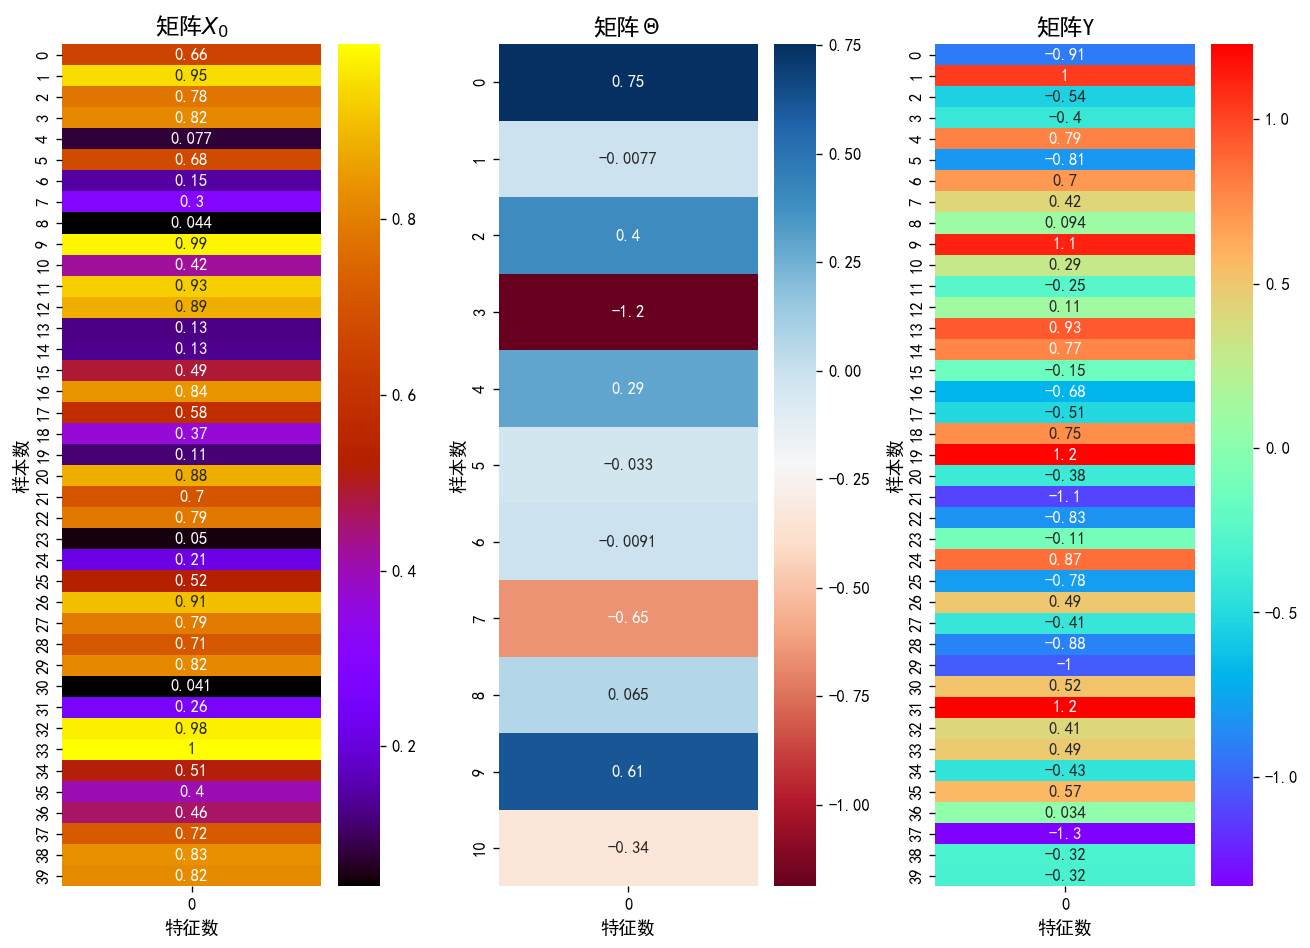

In [630]:
# 单行矩阵可视化
x0,X=mar_p(40,10)
Y=mar_Sin7(x0,Mu)
Theta=np.random.normal(0, 0.5,(X.shape[1],1))
plt.subplots(figsize = (11,8),dpi=120)

# 创建X热图的子图

plt.subplot(1, 3, 1)  # 1 行 2 列，第一个子图
plt.title("矩阵$X_0$", size=14)
sns.heatmap(np.mat(x0).T, annot=True, square=False, cmap="gnuplot")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

# 创建T热图的子图
plt.subplot(1, 3, 2)  # 1 行 2 列，第二个子图
plt.title("矩阵Θ", size=14)
sns.heatmap(Theta, annot=True, square=False, cmap="RdBu")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)


# 创建Y热图的子图
plt.subplot(1, 3, 3)  # 1 行 2 列，第二个子图
plt.title("矩阵Y", size=14)
sns.heatmap(Y, annot=True, square=False, cmap="rainbow")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

plt.tight_layout()



### 设计矩阵

形如 $\mathbf{x} =\begin{bmatrix}
 I & x
\end{bmatrix}$ 的矩阵被称为设计矩阵

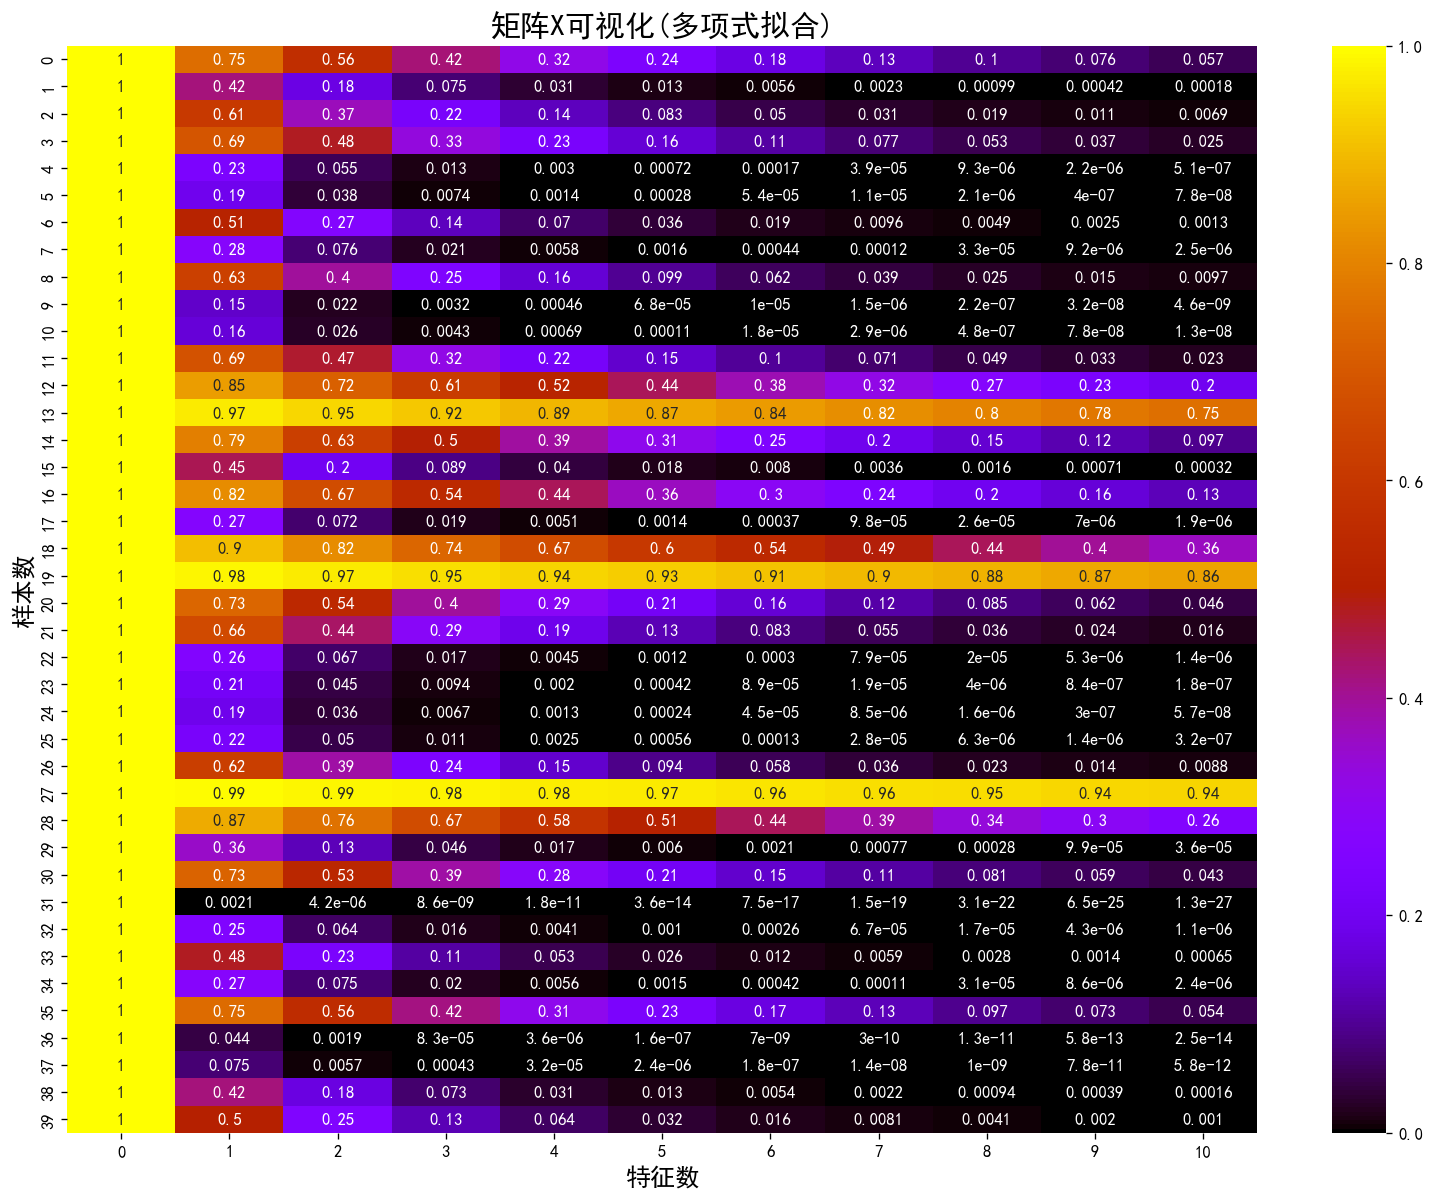

In [631]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
plt.subplots(figsize = (16,12),dpi=120)
plt.title("矩阵X可视化(多项式拟合)",size=18)
x0,X=mar_p(40,10)
sns.heatmap(X, annot=True,square=False,cmap="gnuplot")
plt.ylabel("样本数",size=15)
plt.xlabel("特征数",size=15)
plt.show()

<div class="alert alert-success">

初始随机数的相对大小对后续特征的生成影响显著，特征项越多，区分越不明显。
<br>
</div>

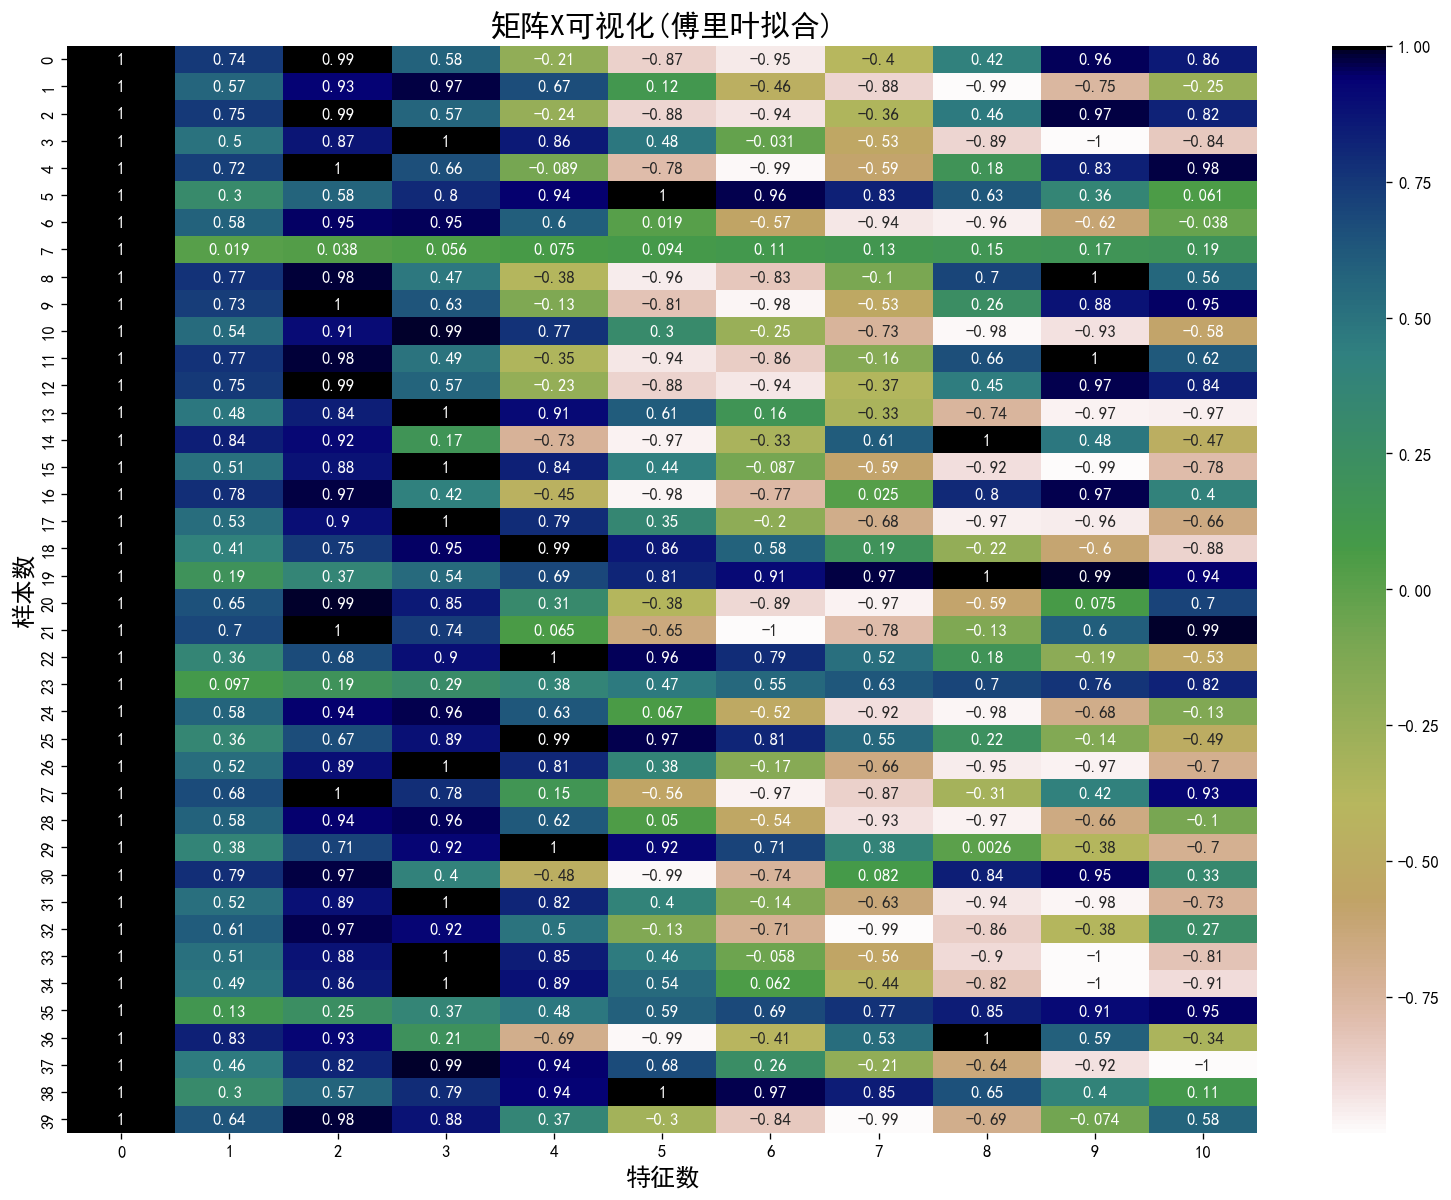

In [632]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
plt.subplots(figsize = (16,12),dpi=120)
plt.title("矩阵X可视化(傅里叶拟合)",size=18)
x0,X=mar_f(40,10)
sns.heatmap(X, annot=True,square=False,cmap="gist_earth_r")
plt.ylabel("样本数",size=15)
plt.xlabel("特征数",size=15)
plt.show()

### 随机扰动

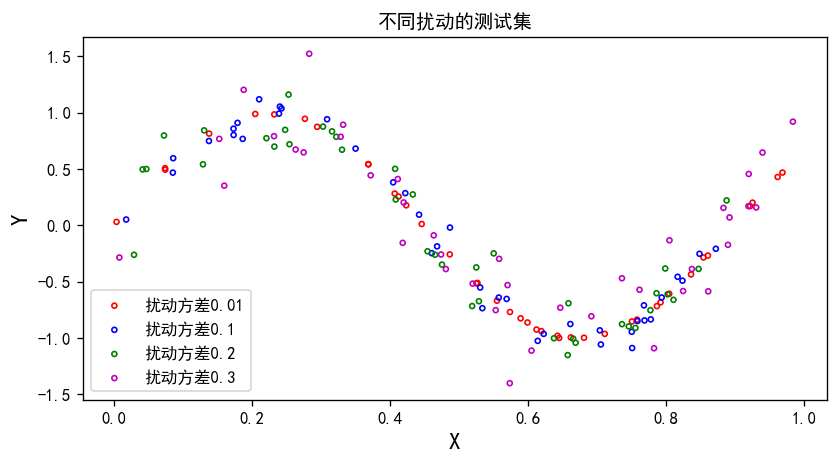

In [633]:
#绘图
plt.figure(figsize=(8,4),dpi=120)
R=['r','b','g',"m"]
mu=[0.01,0.1,0.2,0.3]
for i in range(len(mu)):
    Mu=mu[i]
    x0,X=mar_p(40,10)
    Y=mar_Sin7(x0,Mu)
    plt.scatter(x0,np.array(Y).flatten(),color='none', marker='o',edgecolors=R[i],label=f"扰动方差{Mu}",s=9)
Ls=14
plt.title("不同扰动的测试集",size=Ls/1.2)
plt.ylabel("Y",size=Ls)
plt.xlabel("X",size=Ls)
plt.legend()

<div class="alert alert-warning">

初始随机数的扰动过大会严重干扰测试集的生成，对之后的拟合造成误导。暂不处理有偏的随机误差项对结果的干扰。
<br>
</div>

---------
--------
# 三 · 多项式拟合

In [754]:
x0,X=mar_p(40,10)
Y=mar_Sin7(x0,0.1)
Theta=np.random.normal(0, 500,(X.shape[1],1))

### 解析解

In [752]:
Theta_opt=((X.T*X).I)*X.T*Y

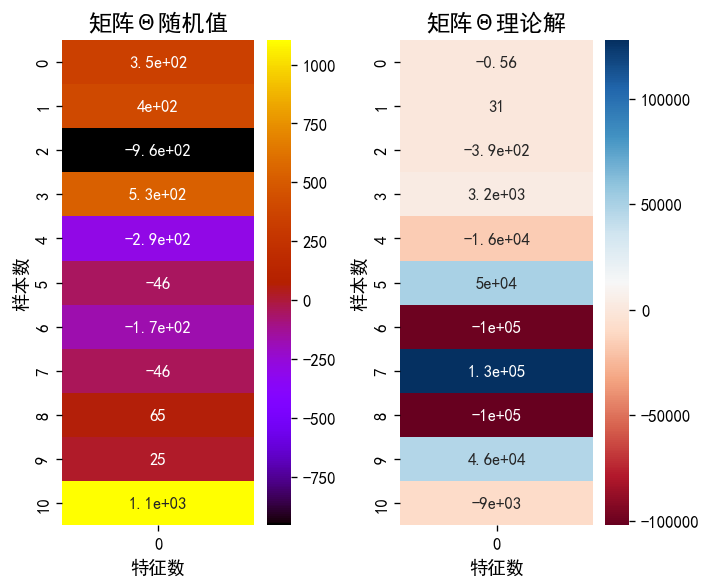

In [755]:
plt.subplots(figsize = (6,5),dpi=120)

# 创建T热图的子图
plt.subplot(1, 2, 1)  # 1 行 2 列，第一个子图
plt.title("矩阵Θ随机值", size=14)
sns.heatmap(Theta, annot=True, square=False, cmap="gnuplot")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

# 创建T_0热图的子图
plt.subplot(1, 2, 2)  # 1 行 2 列，第二个子图
plt.title("矩阵Θ理论解", size=14)
sns.heatmap(Theta_opt, annot=True, square=False, cmap="RdBu")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

plt.tight_layout()

In [640]:
# 损失函数
def J(X,Theta,Y):
    m=len(Y)
    return np.array((X*Theta-Y).T*(X*Theta-Y)/2/m).flatten()[0]

In [641]:
J(X,Theta_opt,Y)

4.058446808182025e-07

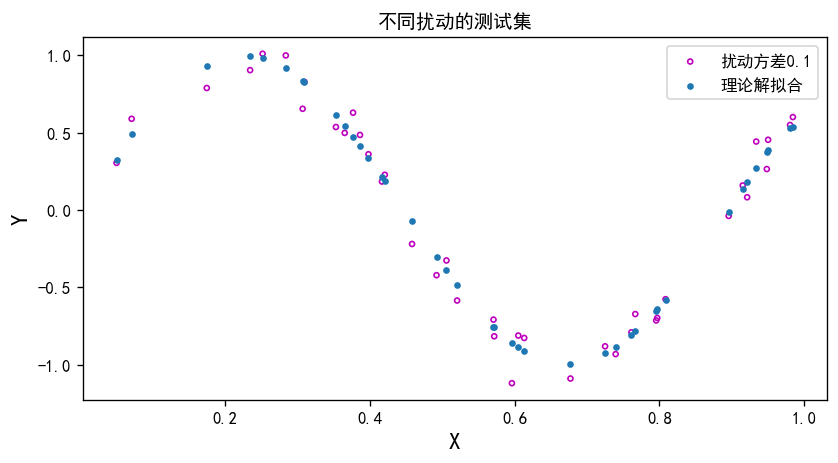

In [767]:
#绘图
plt.figure(figsize=(8,4),dpi=120)
plt.scatter(x0,np.array(Y).flatten(),color='none', marker='o',edgecolors="m",label=f"扰动方差{0.1}",s=9)
y=X*Theta_opt
plt.scatter(x0,np.array(y),label=f"理论解拟合",s=9)
# y=X*Theta
# plt.scatter(x0,np.array(y),label=f"理论解拟合",s=9)
Ls=14
plt.title("不同扰动的测试集",size=Ls/1.2)
plt.ylabel("Y",size=Ls)
plt.xlabel("X",size=Ls)
plt.legend()

### 梯度下降法学习曲线

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


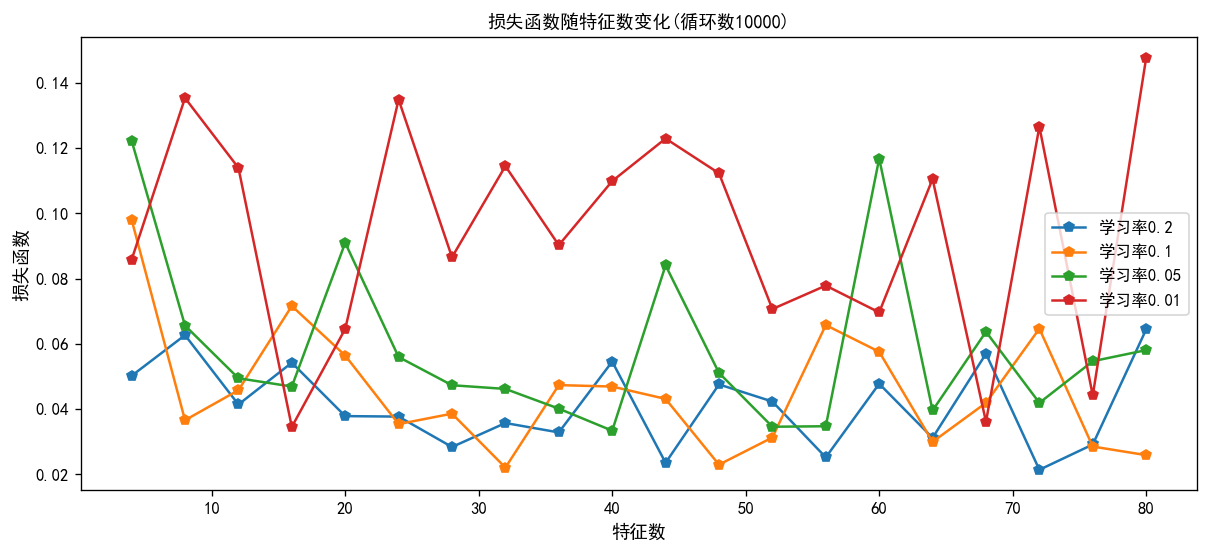

In [709]:
np.random.seed(115)

t_final=10000
alpha=0.01
plt.subplots(figsize = (12,5),dpi=120)

for alpha in [0.2,0.1,0.05,0.01]:
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)
        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"学习率{alpha}")
    
plt.title("损失函数随特征数变化(循环数10000)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.67it/s]


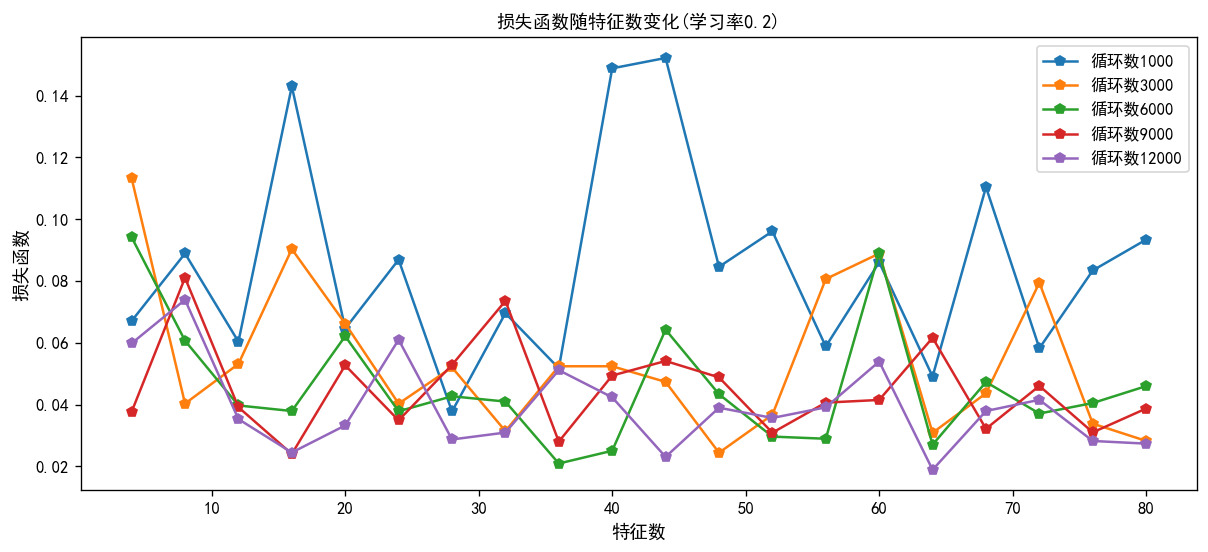

In [710]:
np.random.seed(115)

t_final=10000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)

for t_final in [1000,3000,6000,9000,12000]:
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)
        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final}")
    
plt.title("损失函数随特征数变化(学习率0.2)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

循环数不同，对同一特征数的样本处理效果不同。一般而言，循环数较大的拟合效果好。
<br>
</div>

### 评估拟合效果

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.56it/s]


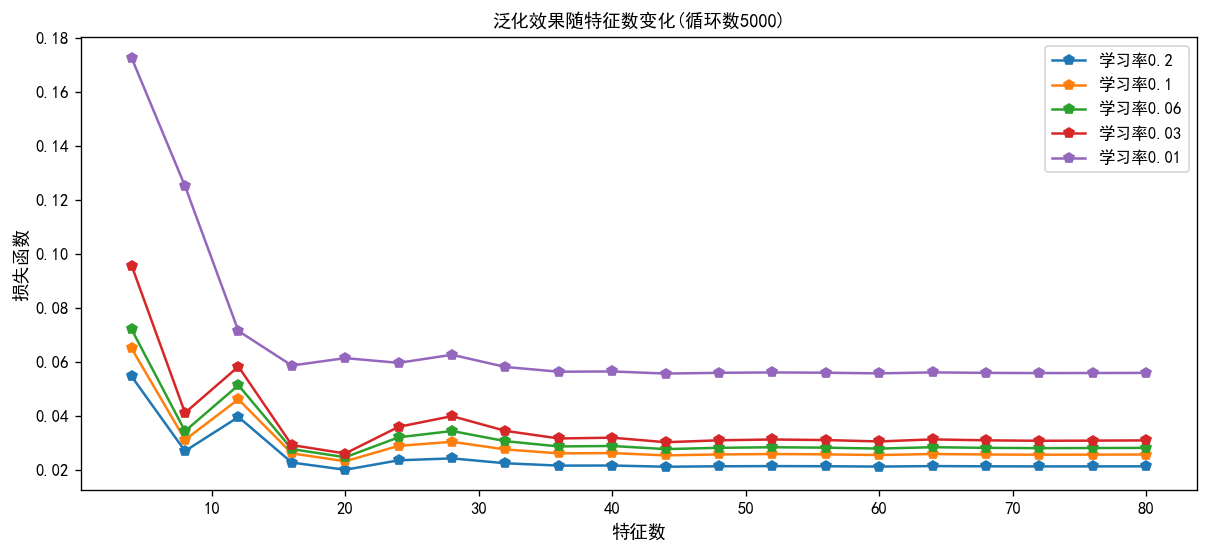

In [711]:

t_final=5000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)

for alpha in [0.2,0.1,0.06,0.03,0.01]:
    
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        np.random.seed(521)
        x1,X_e=mar_p(20,N)
        Y_e=mar_Sin7(x1,0.2)
        
        np.random.seed(77)        
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.001)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"学习率{alpha}")
    
plt.title("泛化效果随特征数变化(循环数5000)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

不同学习率，样本特征数在20左右，模型泛化效果较优，后续引入的特征数会干扰模型泛化能力。
<br>
</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


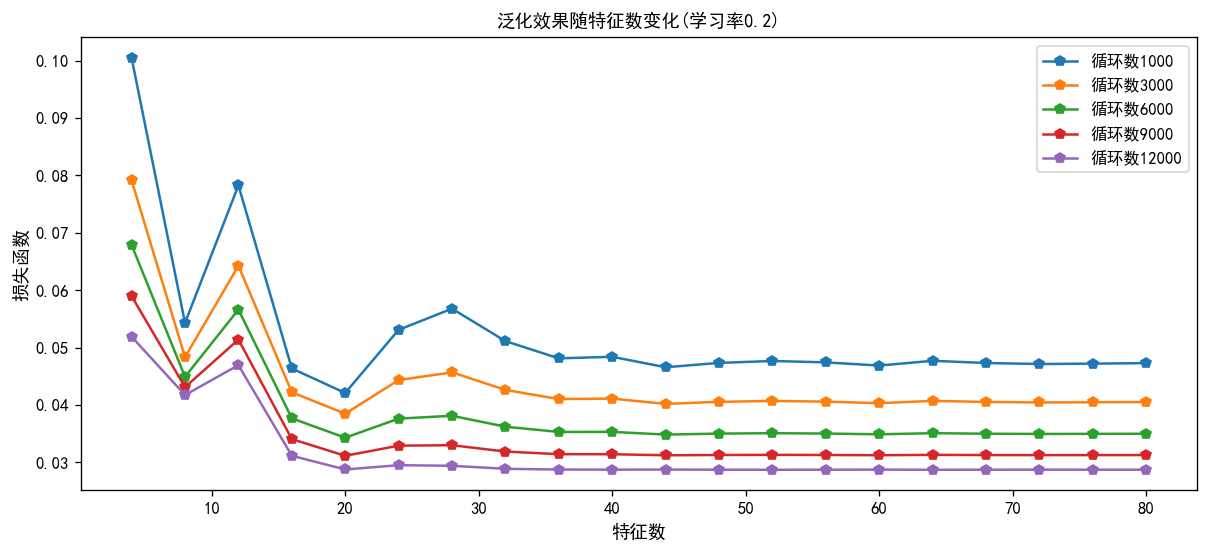

In [713]:

t_final=10000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)


for t_final in [1000,3000,6000,9000,12000]:
    
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        np.random.seed(520)
        x1,X_e=mar_p(20,N)
        Y_e=mar_Sin7(x1,0.2)
        
        np.random.seed(77)        
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final}")
    
plt.title("泛化效果随特征数变化(学习率0.2)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

不同循环次数，样本特征数在20左右，模型泛化效果较优，后续引入的特征数会干扰模型泛化能力。
<br>
</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.74it/s]


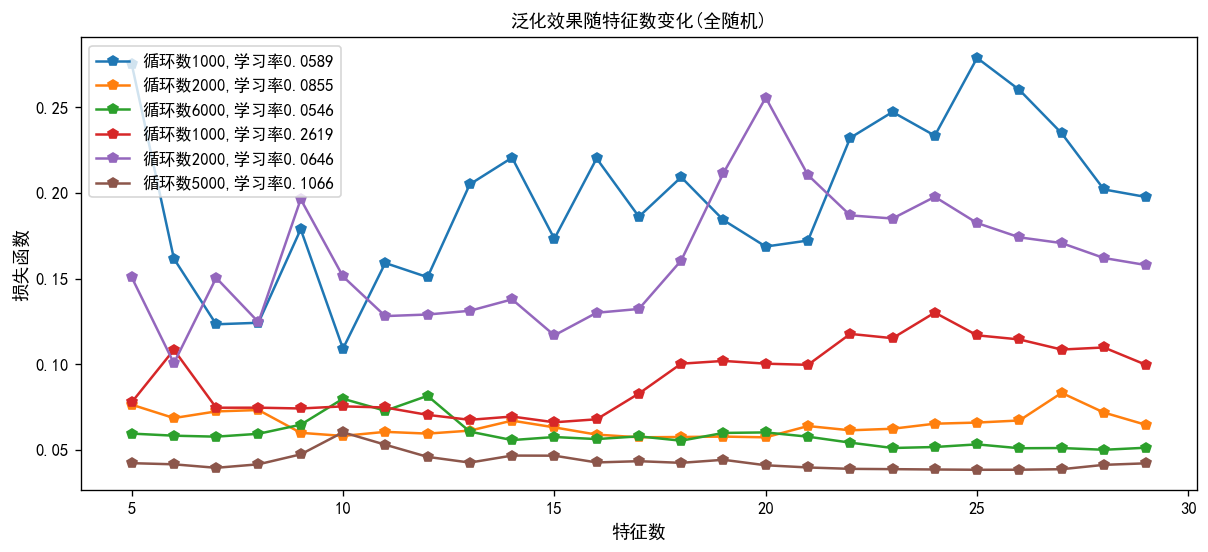

In [724]:
plt.subplots(figsize = (12,5),dpi=120)
for i in range(6):
    t_final=np.random.choice([2000,1000,3000,4000,5000,6000,8000,11000])
    alpha=np.random.uniform(0.001,0.3)
    plotX=range(5,30,1)
    plotY=[]
    A=np.random.randint(1,100)
    B=np.random.randint(1,100)
    for N in tqdm(range(5,30,1)):
        np.random.seed(A)
        x1,X_e=mar_p(20,N)
        Y_e=mar_Sin7(x1,0.2)  
        np.random.seed(B)  
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final},学习率{round(alpha,4)}")
    
plt.title("泛化效果随特征数变化(全随机)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

在特征数10-20内，模型泛化能力强。
<br>
</div>

---------
--------
# 四 · 傅里叶级数拟合

In [776]:
x0,X=mar_f(40,10)
Y=mar_Sin7(x0,0.1)
Theta=np.random.normal(0, 5,(X.shape[1],1))

### 解析解

In [777]:
Theta_opt=((X.T*X).I)*X.T*Y

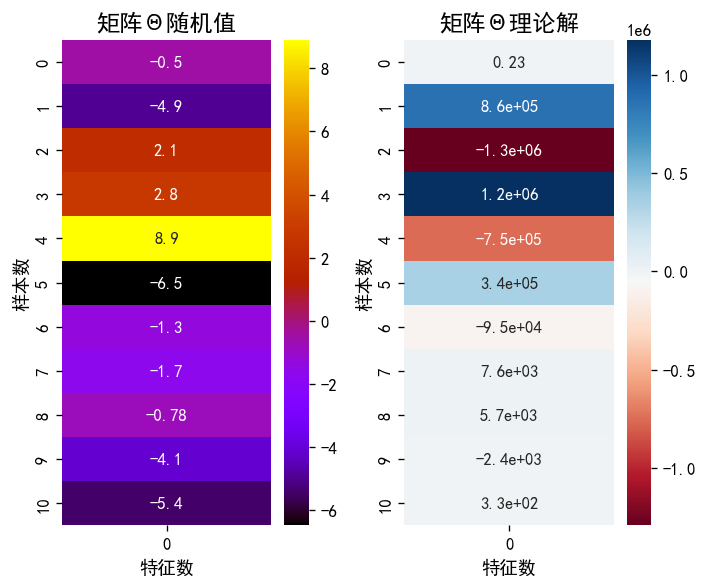

In [778]:
plt.subplots(figsize = (6,5),dpi=120)

# 创建T热图的子图
plt.subplot(1, 2, 1)  # 1 行 2 列，第一个子图
plt.title("矩阵Θ随机值", size=14)
sns.heatmap(Theta, annot=True, square=False, cmap="gnuplot")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

# 创建T_0热图的子图
plt.subplot(1, 2, 2)  # 1 行 2 列，第二个子图
plt.title("矩阵Θ理论解", size=14)
sns.heatmap(Theta_opt, annot=True, square=False, cmap="RdBu")
plt.ylabel("样本数",size=11)
plt.xlabel("特征数",size=11)

plt.tight_layout()

In [779]:
J(X,Theta_opt,Y)

0.009362276059870925

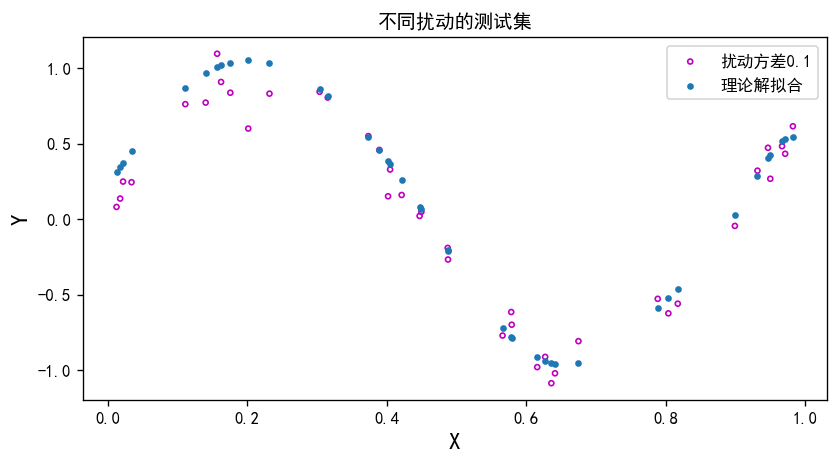

In [780]:
#绘图
plt.figure(figsize=(8,4),dpi=120)
plt.scatter(x0,np.array(Y).flatten(),color='none', marker='o',edgecolors="m",label=f"扰动方差{0.1}",s=9)
y=X*Theta_opt
plt.scatter(x0,np.array(y),label=f"理论解拟合",s=9)
# y=X*Theta
# plt.scatter(x0,np.array(y),label=f"理论解拟合",s=9)
Ls=14
plt.title("不同扰动的测试集",size=Ls/1.2)
plt.ylabel("Y",size=Ls)
plt.xlabel("X",size=Ls)
plt.legend()

<div class="alert alert-success">

相较多项式而言，该方法精度较低
<br>
</div>

### 梯度下降法学习曲线

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.04it/s]


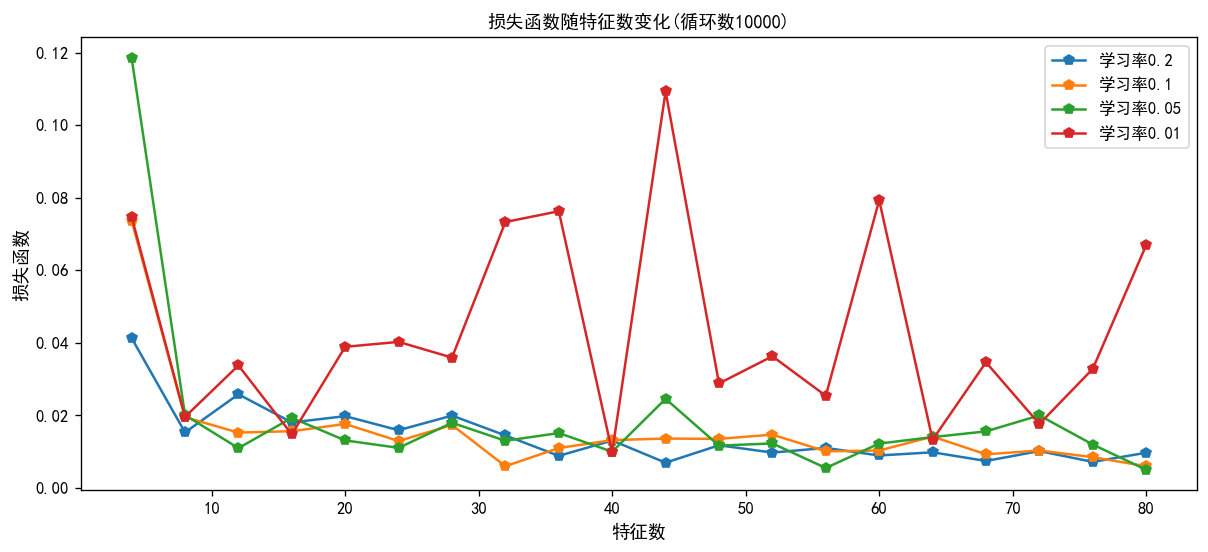

In [731]:
np.random.seed(115)

t_final=10000
alpha=0.01
plt.subplots(figsize = (12,5),dpi=120)

for alpha in [0.2,0.1,0.05,0.01]:
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        x0,X_t=mar_f(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)
        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"学习率{alpha}")
    
plt.title("损失函数随特征数变化(循环数10000)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-warning">

学习率较小时傅里叶级数展开收敛性意外下降。
<br>
</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.65it/s]


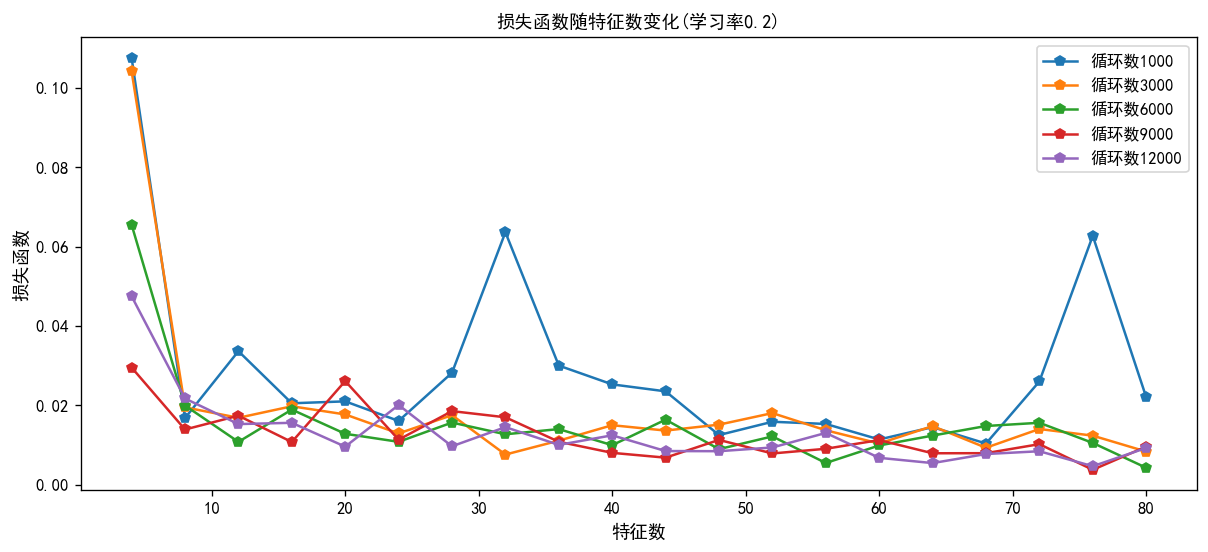

In [732]:
np.random.seed(115)

t_final=10000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)

for t_final in [1000,3000,6000,9000,12000]:
    plotX=range(4,81,4)
    plotY=[]
    for N in tqdm(range(4,81,4)):
        x0,X_t=mar_f(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)
        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final}")
    
plt.title("损失函数随特征数变化(学习率0.2)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

循环数不同，对同一特征数的样本处理效果不同。一般而言，循环数较大的拟合效果好。
<br>
</div>

### 评估拟合效果

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.72it/s]


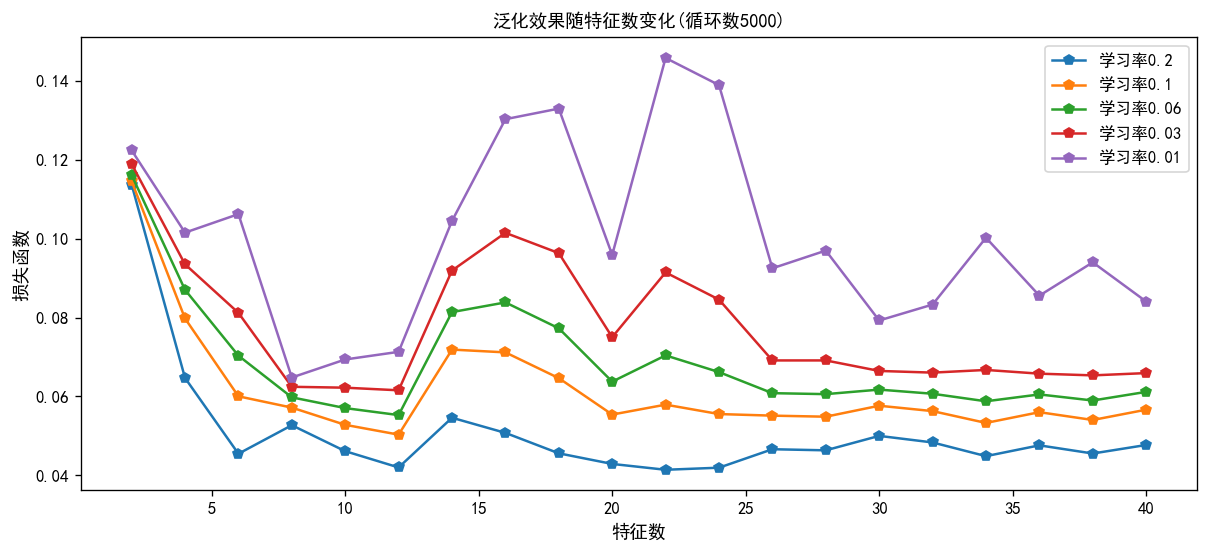

In [737]:

t_final=5000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)

for alpha in [0.2,0.1,0.06,0.03,0.01]:
    
    plotX=range(2,41,2)
    plotY=[]
    for N in tqdm(range(2,41,2)):
        np.random.seed(52)
        x1,X_e=mar_f(20,N)
        Y_e=mar_Sin7(x1,0.2)
        
        np.random.seed(7)        
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.001)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"学习率{alpha}")
    
plt.title("泛化效果随特征数变化(循环数5000)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

不同学习率，样本特征数在8左右，模型泛化效果较优，后续引入的特征数会干扰模型泛化能力。
<br>
</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]


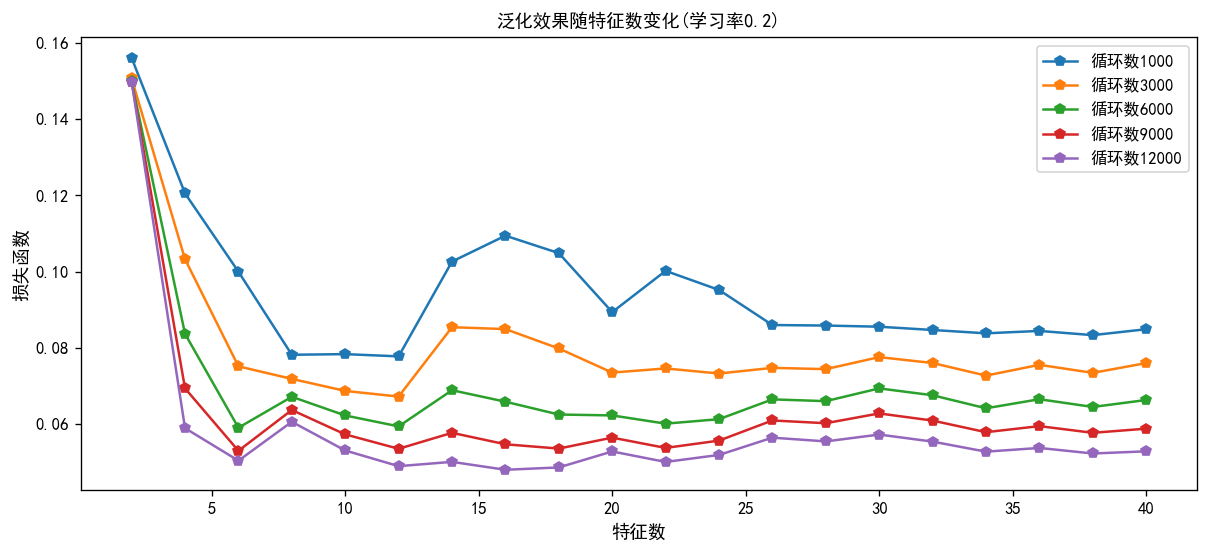

In [738]:

t_final=10000
alpha=0.2
plt.subplots(figsize = (12,5),dpi=120)


for t_final in [1000,3000,6000,9000,12000]:
    
    plotX=range(2,41,2)
    plotY=[]
    for N in tqdm(range(2,41,2)):
        np.random.seed(52)
        x1,X_e=mar_f(20,N)
        Y_e=mar_Sin7(x1,0.2)
        
        np.random.seed(7)        
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final}")
    
plt.title("泛化效果随特征数变化(学习率0.2)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

不同循环次数，样本特征数在8左右，模型泛化效果较优，后续引入的特征数会干扰模型泛化能力。
<br>
</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.66it/s]


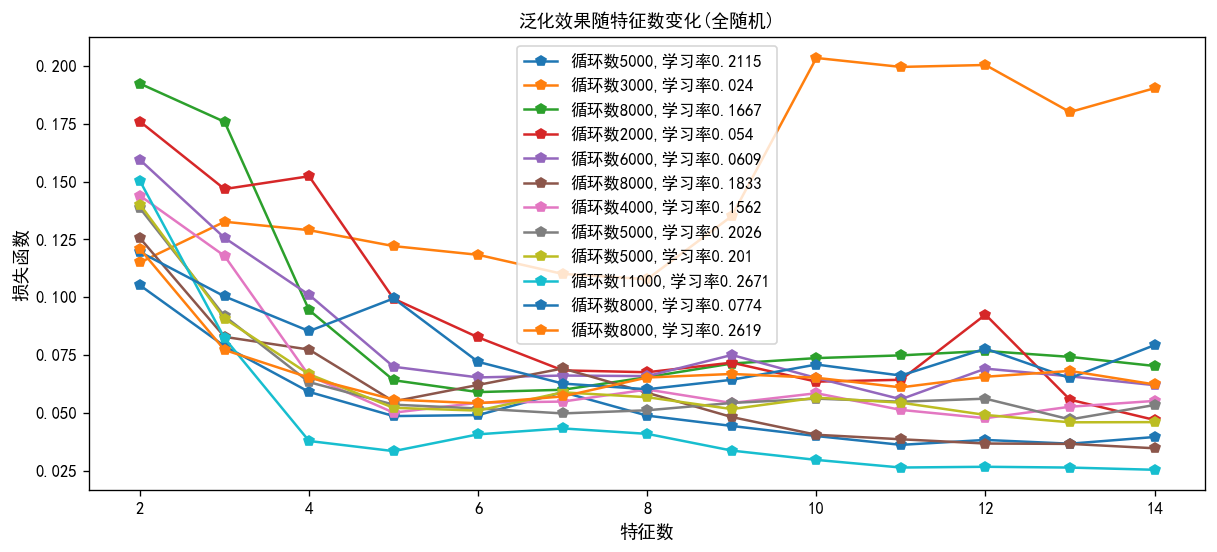

In [740]:
plt.subplots(figsize = (12,5),dpi=120)
for i in range(12):
    t_final=np.random.choice([2000,1000,3000,4000,5000,6000,8000,11000])
    alpha=np.random.uniform(0.001,0.3)
    plotX=range(2,15,1)
    plotY=[]
    A=np.random.randint(1,100)
    B=np.random.randint(1,100)
    for N in tqdm(range(2,15,1)):
        np.random.seed(A)
        x1,X_e=mar_f(20,N)
        Y_e=mar_Sin7(x1,0.2)  
        np.random.seed(B)  
        x0,X_t=mar_p(40,N)
    #     print(x0)
        Y_t=mar_Sin7(x0,0.2)

        Theta=np.random.normal(0, 5,(X_t.shape[1],1))

        theta=copy.deepcopy(Theta)
        grad_T=range(0,t_final)
        grad_Jt=[]
        grad_Je=[]
        for t in range(0,t_final):
            J_res=J(X_t,theta,Y_t)
            theta=theta-alpha/m*X_t.T*(X_t*theta-Y_t)
            grad_Jt.append(J_res)
            grad_Je.append(J(X_e,theta,Y_e))
        plotY.append(grad_Jt[-1])
    plt.plot(plotX,plotY,marker="p",label=f"循环数{t_final},学习率{round(alpha,4)}")
    
plt.title("泛化效果随特征数变化(全随机)",size=11)
plt.ylabel("损失函数",size=11)
plt.xlabel("特征数",size=11)
plt.legend()

<div class="alert alert-success">

在特征数4-8内，模型泛化能力边际收益达平衡点。
<br>
</div>

---------
--------
# 五 · 结语

<div class="alert alert-info">

达到相同精度下，多项式拟合相对于傅里叶级数需要更多的特征数
<br>
</div>

### 特别鸣谢&#x1F339;&#x1F339;&#x1F339;
21世纪互联网的深邃与丰厚

In [1]:
#随机颜色
color_map=np.random.choice(sorted(plt.colormaps()))
plt.get_cmap(color_map)

NameError: name 'plt' is not defined